 # **This notebook demonstrates Exploratory Data Analysis on the House Price dataset**

Here we have explored house price data set. Impact of different features like number of bedrooms, bathrooms, area of basement, living room, rooftop has been visualized. We have also visualized those patterns in various cities in USA. Finally we also explored the impact of time on house price from the data set.

The majority of the plots and visualizations will be generated using data stored in *pandas* dataframes.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housedata/data.dat
/kaggle/input/housedata/output.csv
/kaggle/input/housedata/data.csv


**Importing necessary Libraries and Packages**

In [2]:
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

**Importing the data into Pandas Dataframe**

In [3]:
house_data=pd.read_csv("../input/housedata/data.csv")
house_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

Here type of date is object. We need to convert it into date-time.

In [5]:
house_data["date"]=pd.to_datetime(house_data['date'], infer_datetime_format=True)
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   float64       
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   float64       
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   object        
 15  city           4600 n

Now we will try to investigate the relationship of the features with price.

In [6]:
house_data.corr(method ='pearson') 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


Here we can see that Area of living room (sqft_living)  has the hisghest correlation value with the value. Visualizing with regression plot will make it more clear. 

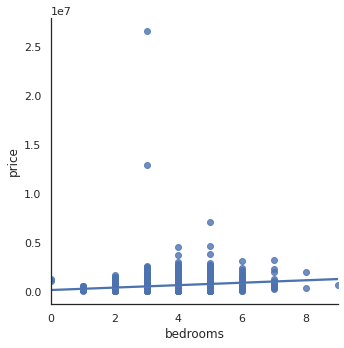

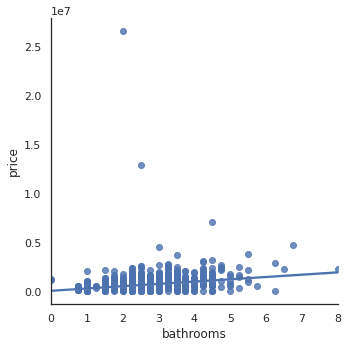

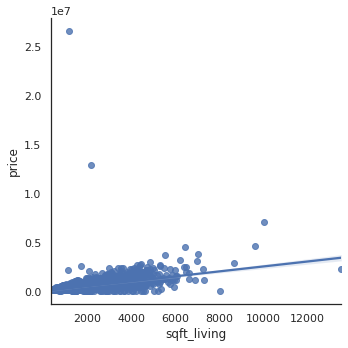

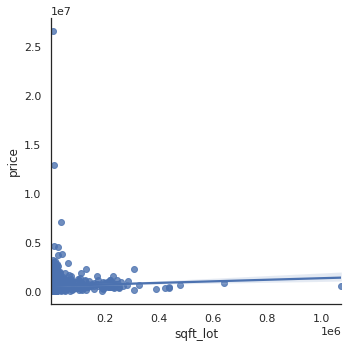

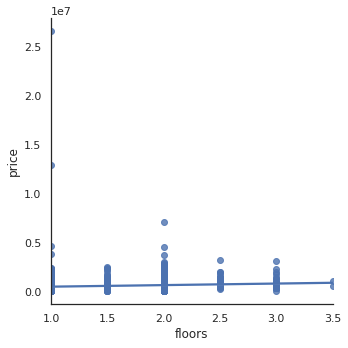

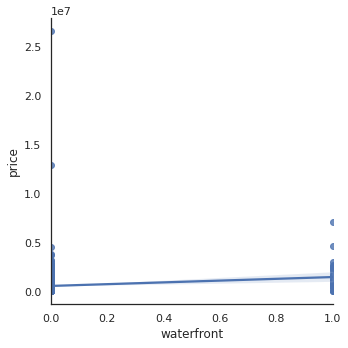

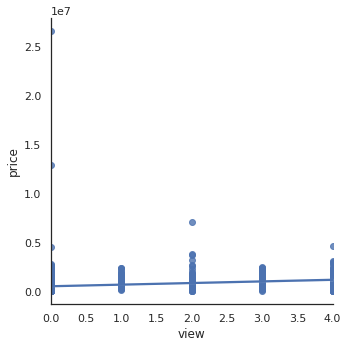

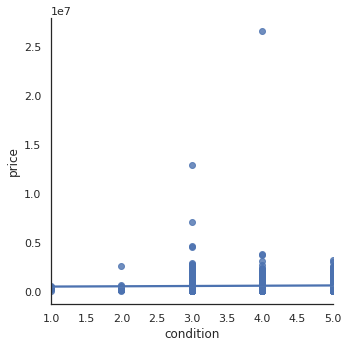

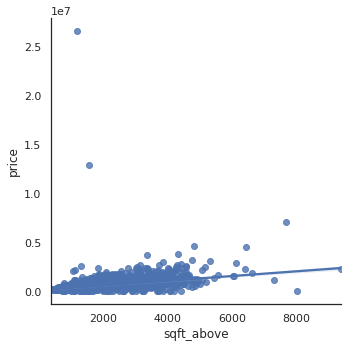

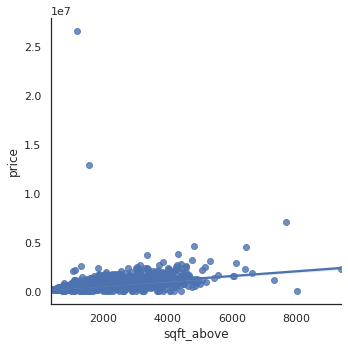

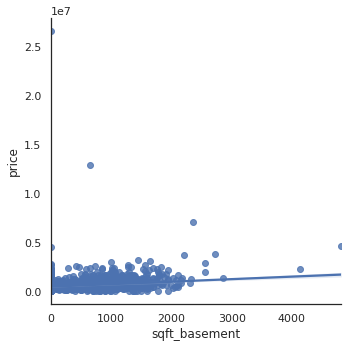

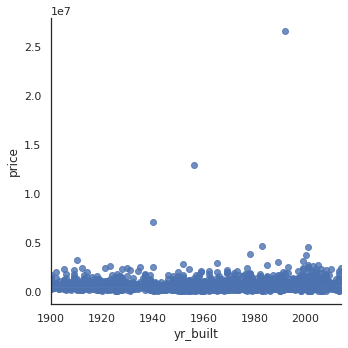

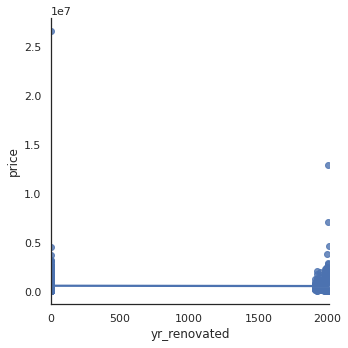

In [7]:
neumaric=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_above','sqft_basement','yr_built','yr_renovated']

for i in neumaric:
    sns.lmplot(x = i, y ='price', data = house_data)


From above visualizations we can see that year renovated, year built, condition features don't have significant impact on price. sqft_living, bathrooms, sqft_above have strong influence.

However we haven't observe the influence of categorical variables on price.

In [8]:
cities=house_data['city'].unique()
cities

array(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
       'Maple Valley', 'North Bend', 'Lake Forest Park', 'Sammamish',
       'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton',
       'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'], dtype=object)

In [9]:
house_data['city'].value_counts()

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
Tukwila                  29
Vashon                   29
SeaTac                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Medina                   11
Clyde Hill               11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific             

We are seeing that some cities don't have sufficient entries. So we are ignoring the cities with less that 100 entries.

In [10]:
cities=['Seattle','Renton','Bellevue','Bellevue','Redmond','Kirkland','Issaquah','Kent','Auburn','Sammamish','Federal Way','Shoreline','Woodinville']
house_data_filtered=house_data[house_data.city.isin(cities)]
house_data_filtered.shape

(3683, 18)

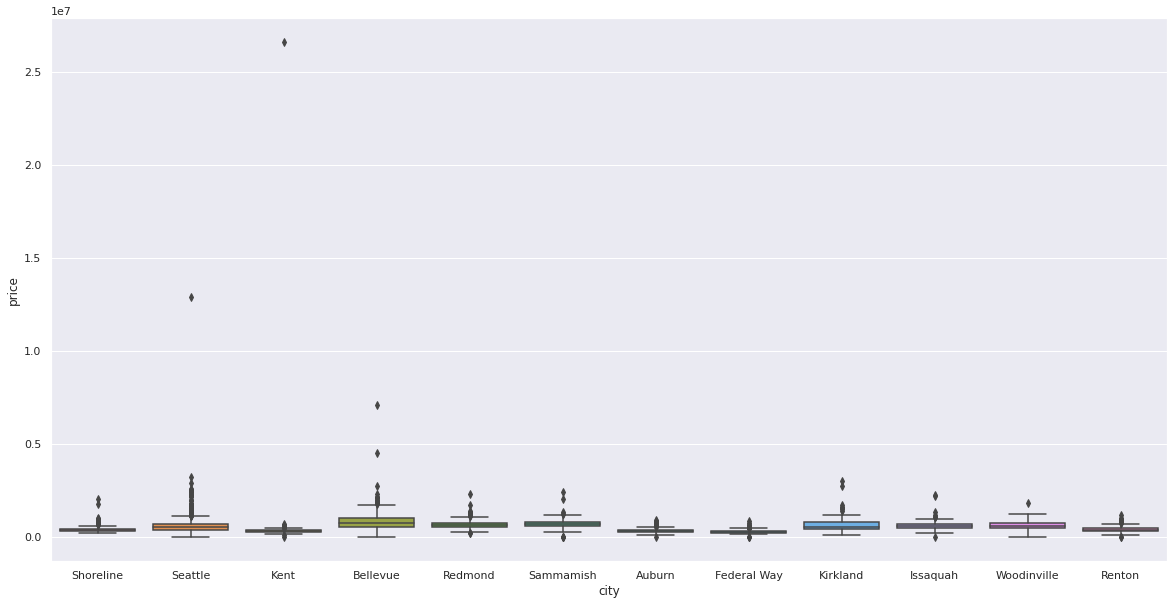

In [11]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(x="city", y="price", data=house_data_filtered)

Here we can see that most of the cities have similar influences on price. But different cities can have different influence on different features.

There are some outliers in dataset. Now we will clean those outliers

In [12]:
q = house_data_filtered["price"].quantile(0.75)
house_data_final = house_data_filtered[(house_data_filtered["price"] < q)]
house_data_final.shape

(2760, 18)

# **Impact of numer of bedrooms in different cities**

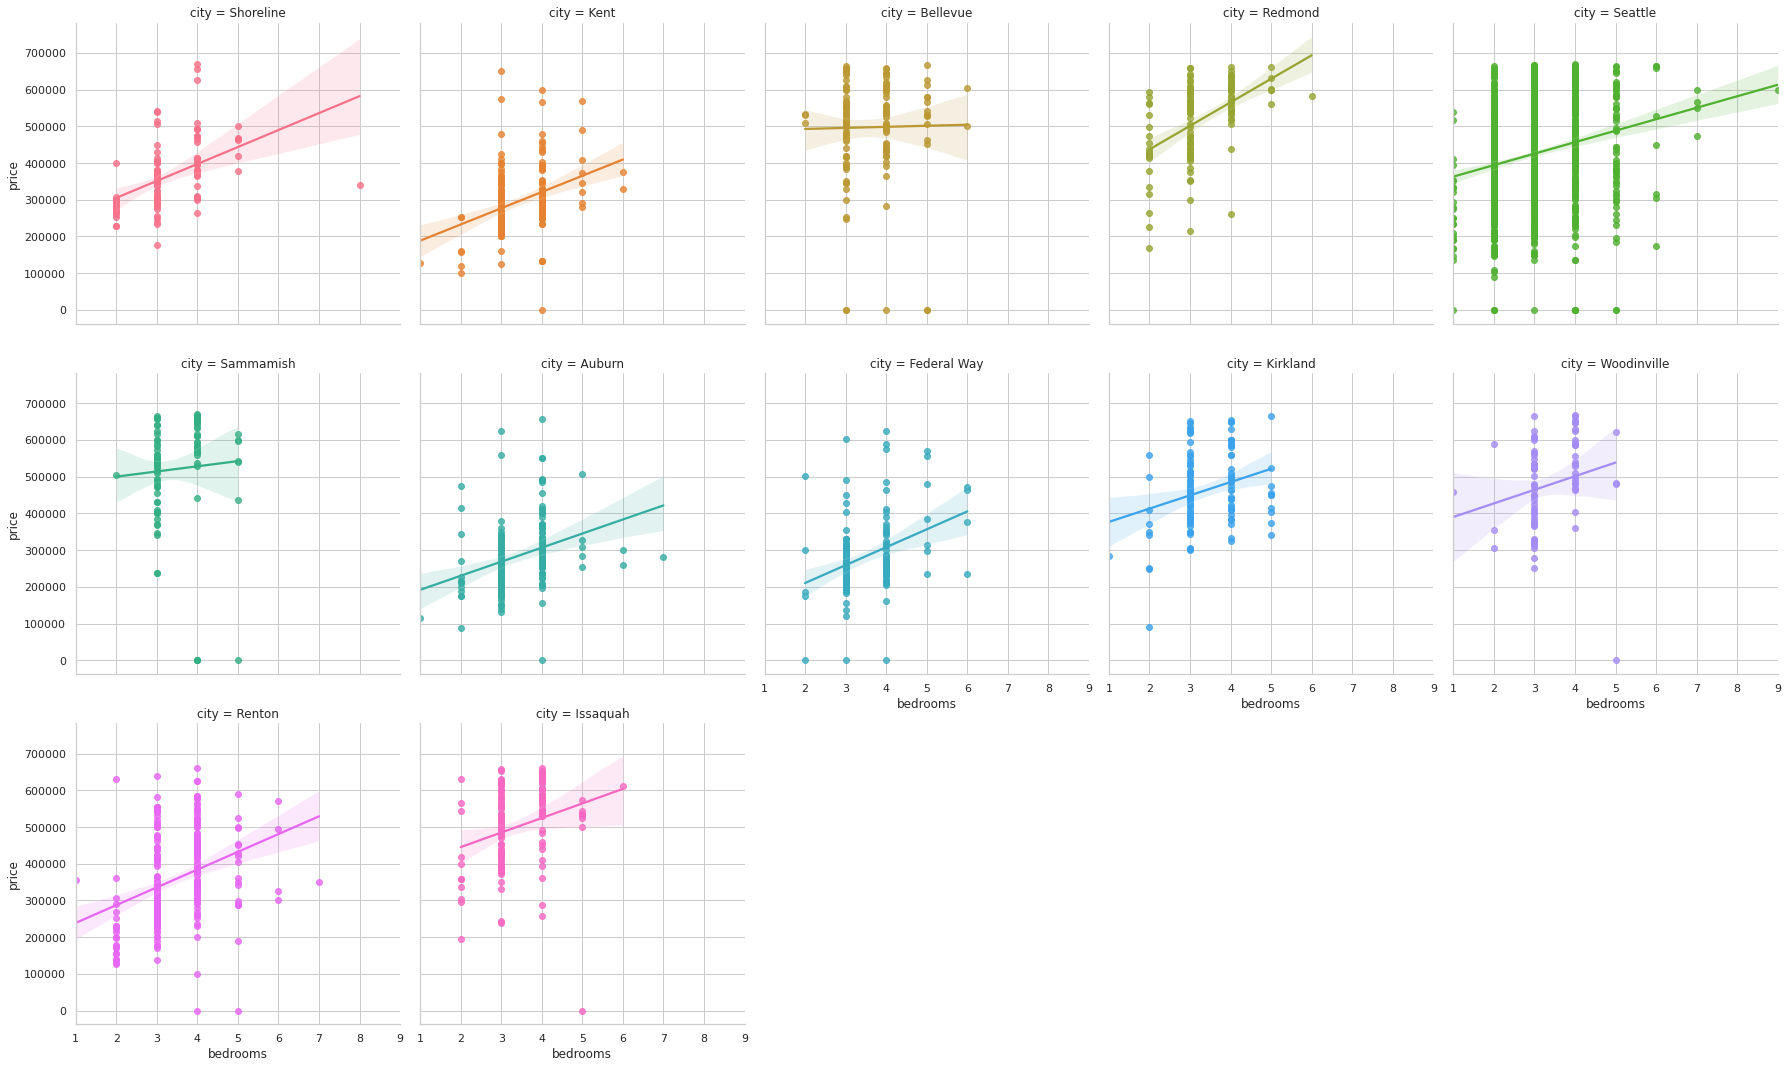

In [13]:
sns.set_style('whitegrid') 
plot=sns.lmplot(x ='bedrooms', y ='price', data = house_data_final,col='city', hue ='city',height=5,col_wrap=5) 


Here we can see that influence of number of bedrooms on house price is not same in all cities. In Shoreline,Kent,Redmond,Auburn,Federal Way,Woodinville,Renton,Issaquah and Kirkland bedrooms have strong positive influence. Wheras in Sammamish,Seattle bedrooms have a little positive influence. In Bellevue there is no significant impact of bedrooms in housing prises

# **Impact of number of bathrooms in different cities**

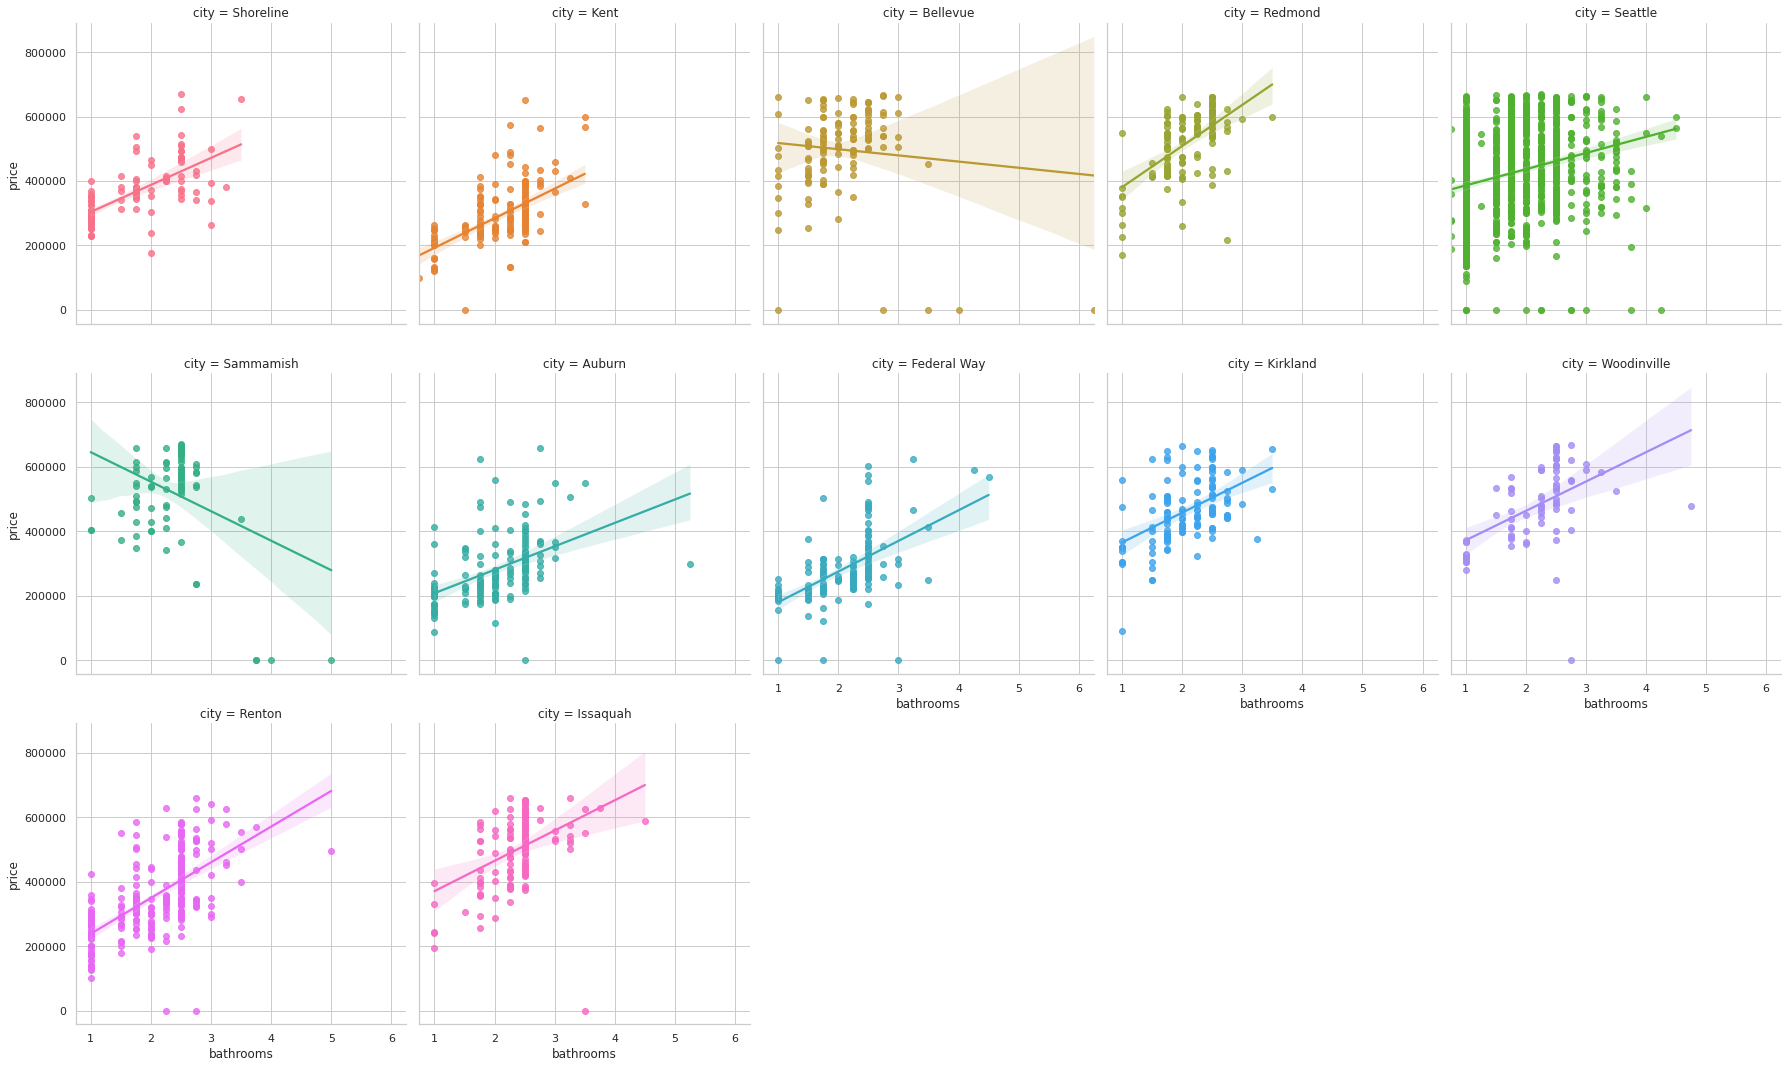

In [14]:
sns.set_style('whitegrid') 
plot=sns.lmplot(x ='bathrooms', y ='price', data = house_data_final,col='city', hue ='city',height=5,col_wrap=5) 

It is clearly seen that number of bathrooms on house price is different in different cities. In Shoreline,Kent, Redmond,Federal Way,Kirkland,Woodinville,Renton, Issaquah number of bathrooms has strong positive influence on house price. In Seattle and Auburn have a little positive impact whereas in Bellevue and Sammamish number of bathrooms has negative impact on house price.


# **Impact of area of living room in different ciites**

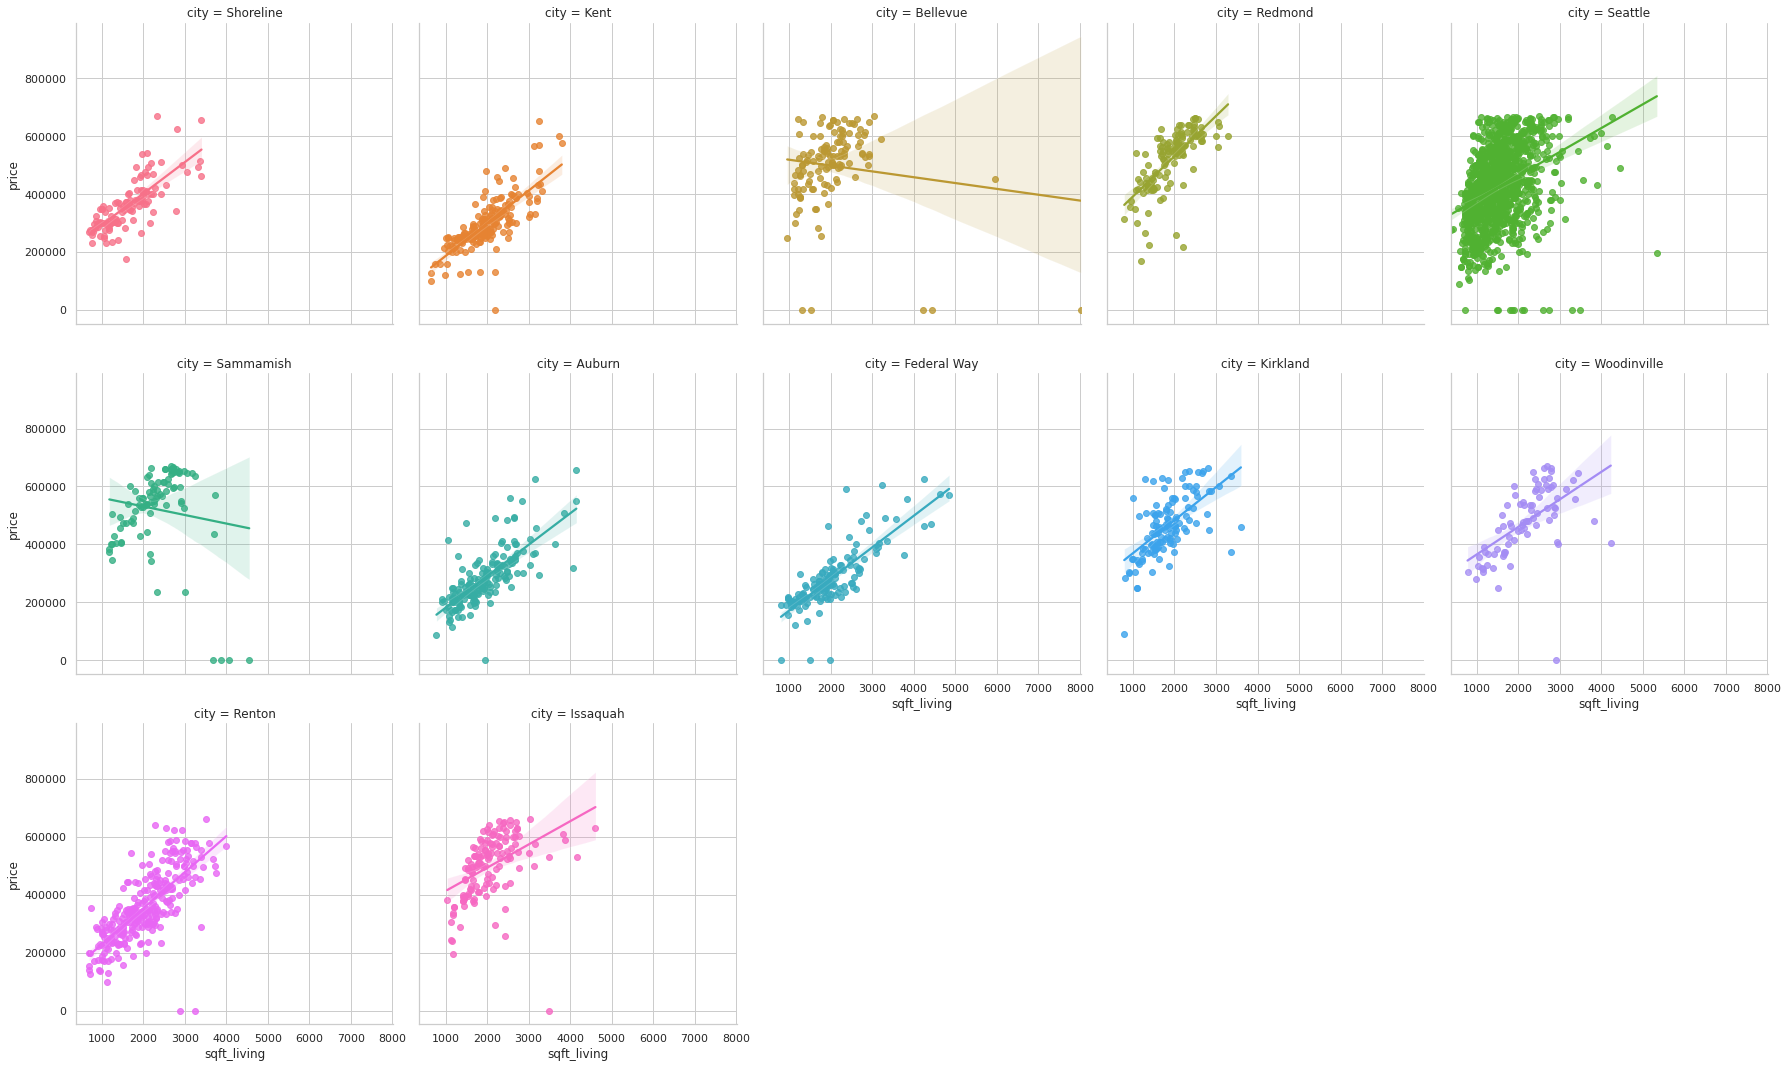

In [15]:
sns.set_style('whitegrid') 
plot=sns.lmplot(x ='sqft_living', y ='price', data = house_data_final,col='city', hue ='city',height=5,col_wrap=5) 

Area of living room has the highest correlation among the features with price. However we can see that in Bellevue and Sammamish area of living room has negative impact on house price. In rest of the cities area of living room has strong positive influence on house price. 

# **Impact of floor space in different cities**

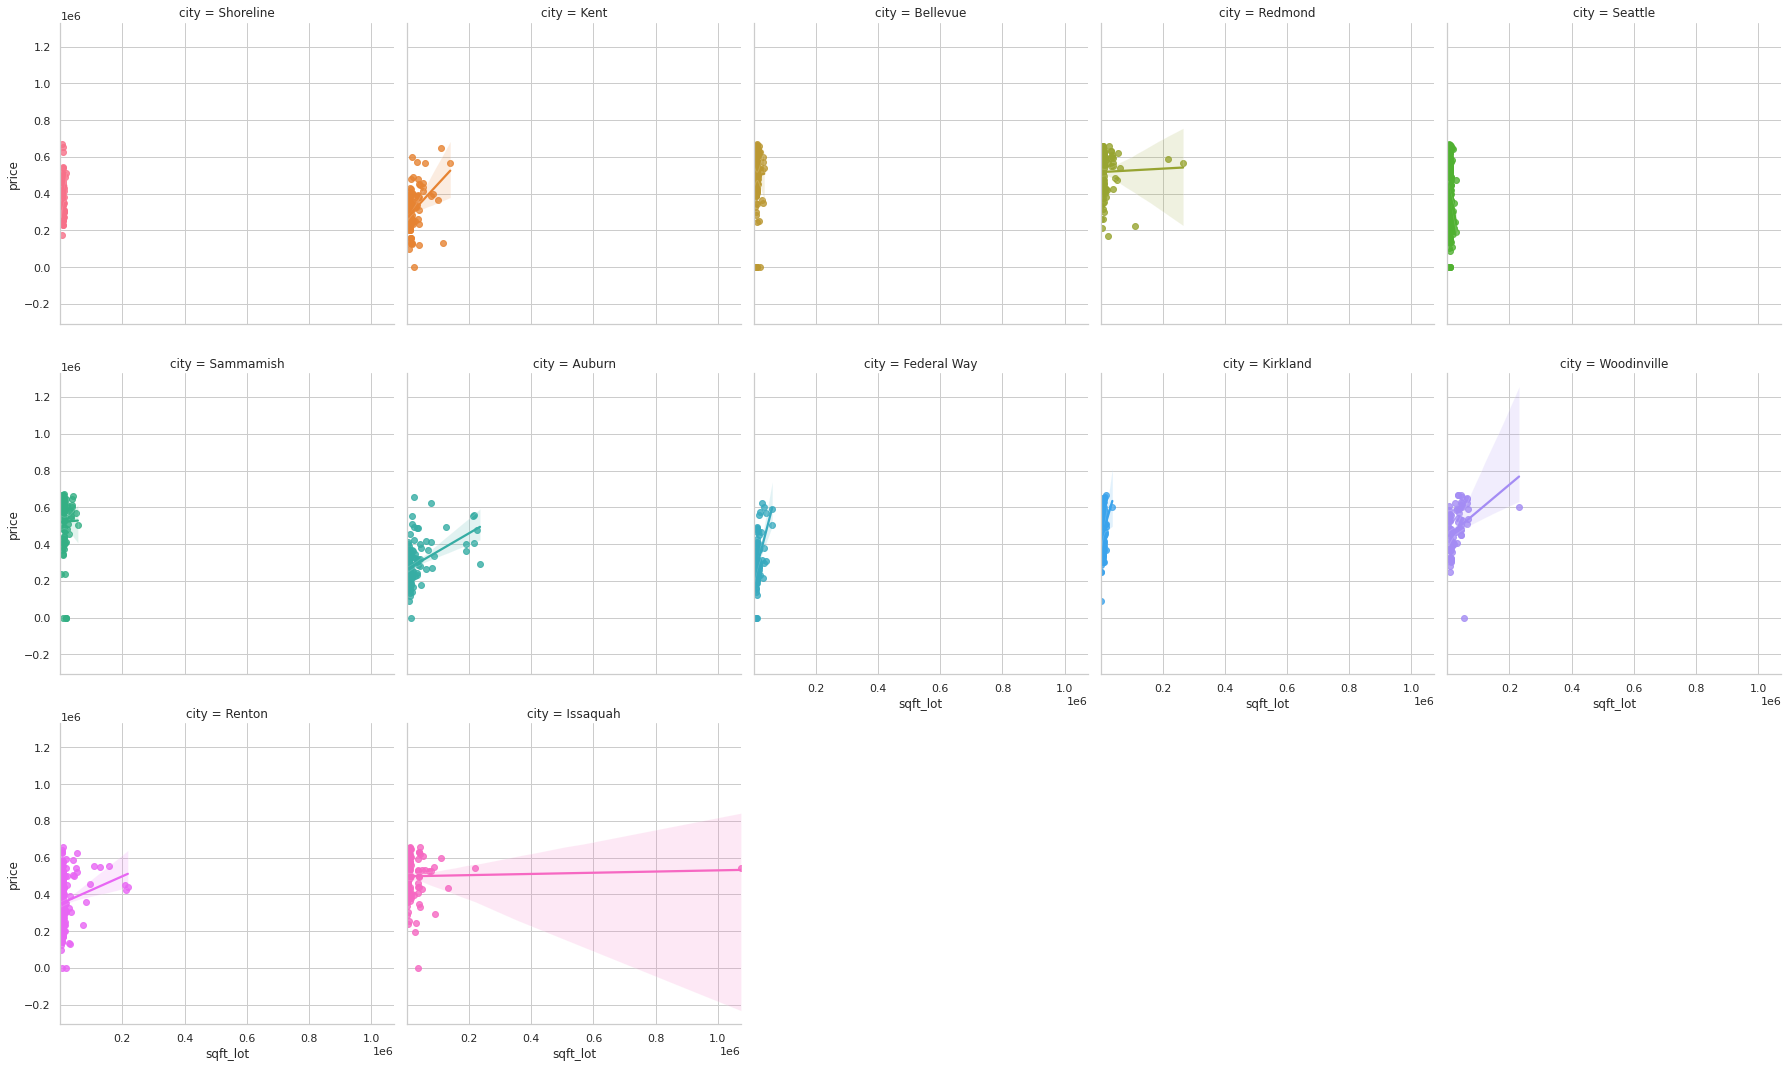

In [16]:
sns.set_style('whitegrid') 
plot=sns.lmplot(x ='sqft_lot', y ='price', data = house_data_final,col='city', hue ='city',height=5,col_wrap=5)


Floor space has a very small correlation value. It doesn't have much impact on house price. Most of the values are limited within a certain range.

# **Impact of area of basement in different cities**

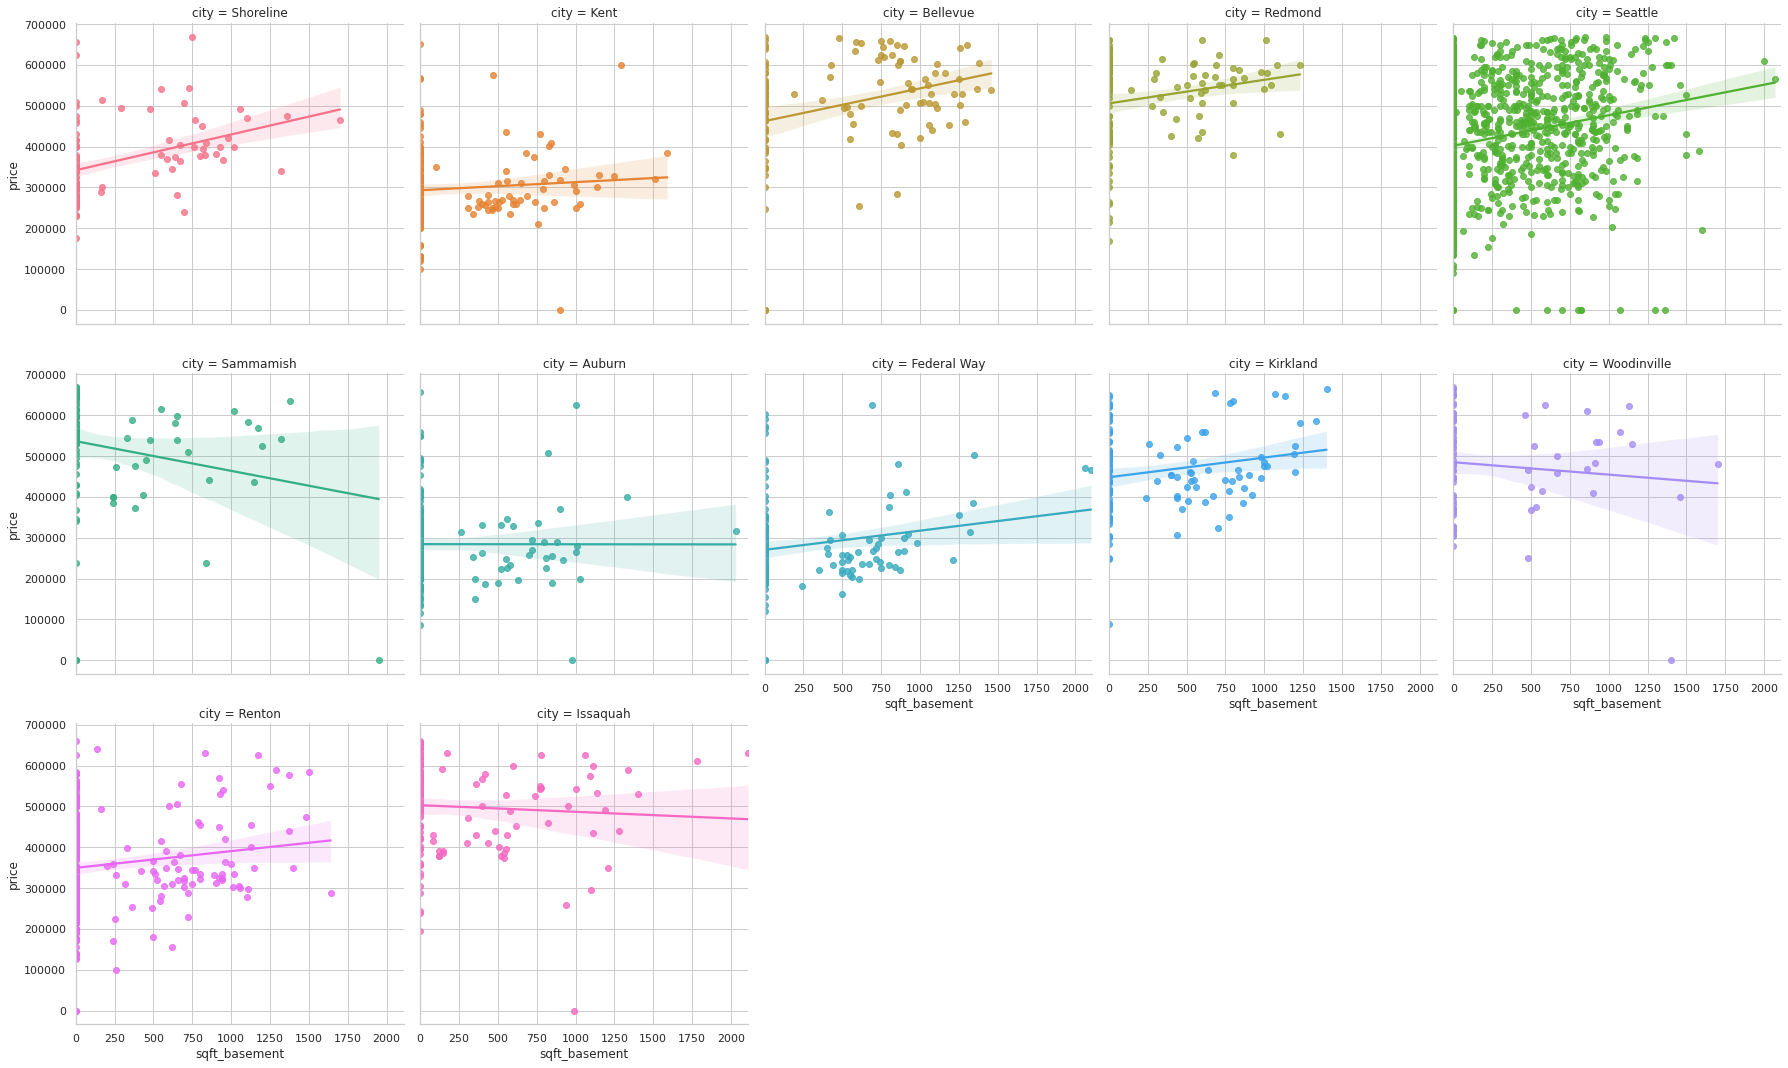

In [17]:
sns.set_style('whitegrid') 
plot=sns.lmplot(x ='sqft_basement', y ='price', data = house_data_final,col='city', hue ='city',height=5,col_wrap=5)


We can see that in cities like Auburn,Kent, Renton area of the basement has no impact on house price. In Sammamish,Issaquah area of basement has negative impact on houseprice.  In other cities area of basement has little positive influence on price. 

# **Impact of area of rooftop in different cities**

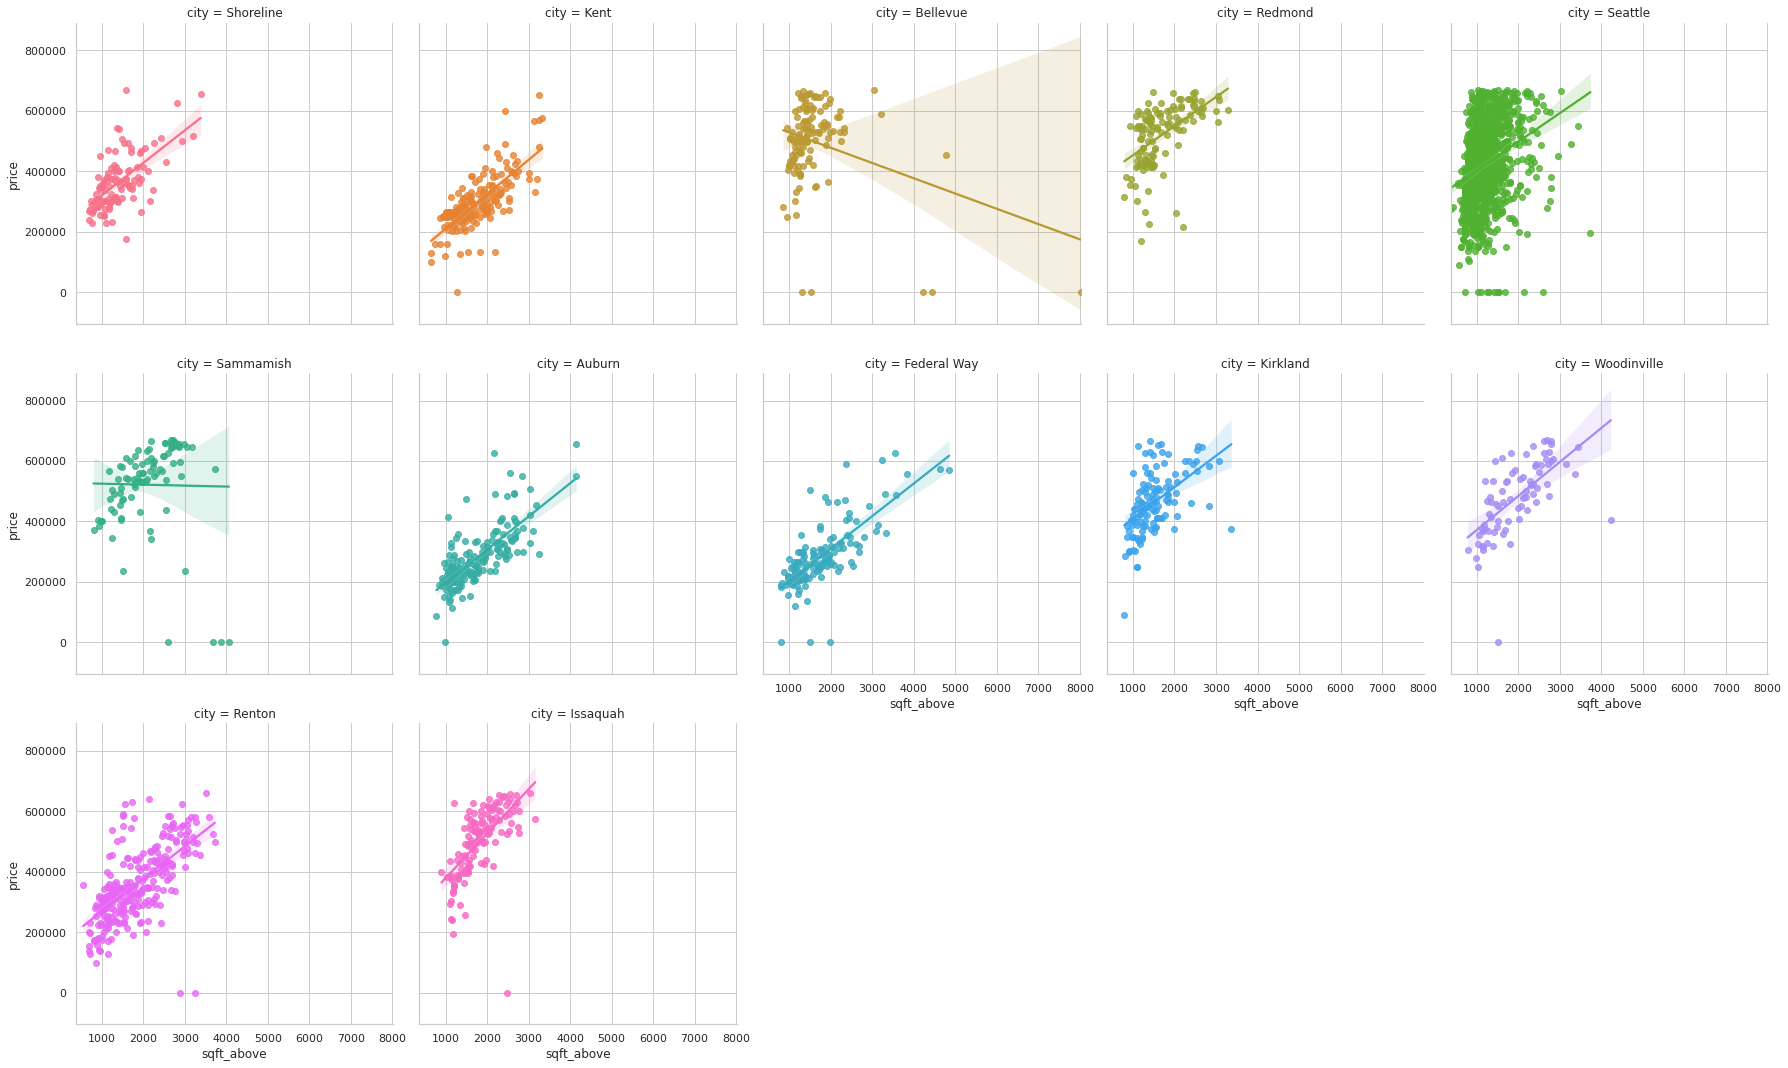

In [18]:
sns.set_style('whitegrid') 
plot=sns.lmplot(x ='sqft_above', y ='price', data = house_data_final,col='city', hue ='city',height=5,col_wrap=5)


From above visualization we can see that area of rooftop can be a good predictor of house price. In Bellevue area of rooftop has negative impact on house price. In rest of the cities area of rooftop has a strong positive influence.

# **Effect of time**

Now we will see the effect of time in house price. For this we need to select same type of houses and analyze them with time.

In [19]:
house_data_final.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,2760.000000,2760.000000,2760.000000,2760.000000,2.760000e+03,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000
mean,408750.634591,3.235870,1.959058,1798.087319,1.102172e+04,1.439312,0.001087,0.090942,3.454710,1527.289855,270.797464,1968.428986,849.485507
std,140253.020232,0.883879,0.687286,673.396039,2.800682e+04,0.552626,0.032957,0.462502,0.663428,619.584131,396.006808,29.373969,986.886095
min,0.000000,1.000000,0.750000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,300000.000000,3.000000,1.500000,1300.000000,4.538000e+03,1.000000,0.000000,0.000000,3.000000,1090.000000,0.000000,1948.000000,0.000000
50%,405000.000000,3.000000,2.000000,1720.000000,7.200000e+03,1.000000,0.000000,0.000000,3.000000,1370.000000,0.000000,1969.000000,0.000000
75%,525000.000000,4.000000,2.500000,2180.000000,9.553250e+03,2.000000,0.000000,0.000000,4.000000,1840.000000,530.000000,1992.000000,2000.000000
max,669950.000000,9.000000,6.250000,8020.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,8020.000000,2110.000000,2014.000000,2014.000000


In [20]:
house_data_t=house_data_final[(house_data_final['bedrooms']<(3.235870+0.883879)) & (house_data_final['bedrooms']>(3.235870-0.883879))]
house_data_t=house_data_final[(house_data_final['bathrooms']<(1.959058+0.687286)) & (house_data_final['bathrooms']>(1.959058-0.687286))]
house_data_t=house_data_final[(house_data_final['sqft_living']<(1798.087319+673.396039)) & (house_data_final['sqft_living']>(1798.087319-673.396039))]
house_data_t=house_data_final[(house_data_final['sqft_above']<(1527.289855+619.584131)) & (house_data_final['sqft_above']>(1527.289855-619.584131))]
house_data_t.shape

(2046, 18)

Now we have selected same type of houses. 

In [21]:
features=['date','price','bedrooms','bathrooms','sqft_living','sqft_above','city']
house_data_t=house_data_t[features]
house_data_t.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_above,city
0,2014-05-02,313000.0,3.0,1.50,1340,1340,Shoreline
2,2014-05-02,342000.0,3.0,2.00,1930,1930,Kent
3,2014-05-02,420000.0,3.0,2.25,2000,1000,Bellevue
4,2014-05-02,550000.0,4.0,2.50,1940,1140,Redmond
6,2014-05-02,335000.0,2.0,2.00,1350,1350,Redmond


We have highest number of entries in Seattle city. So we will visualize price in different time on same type of houses in Seattle city to see the pattern

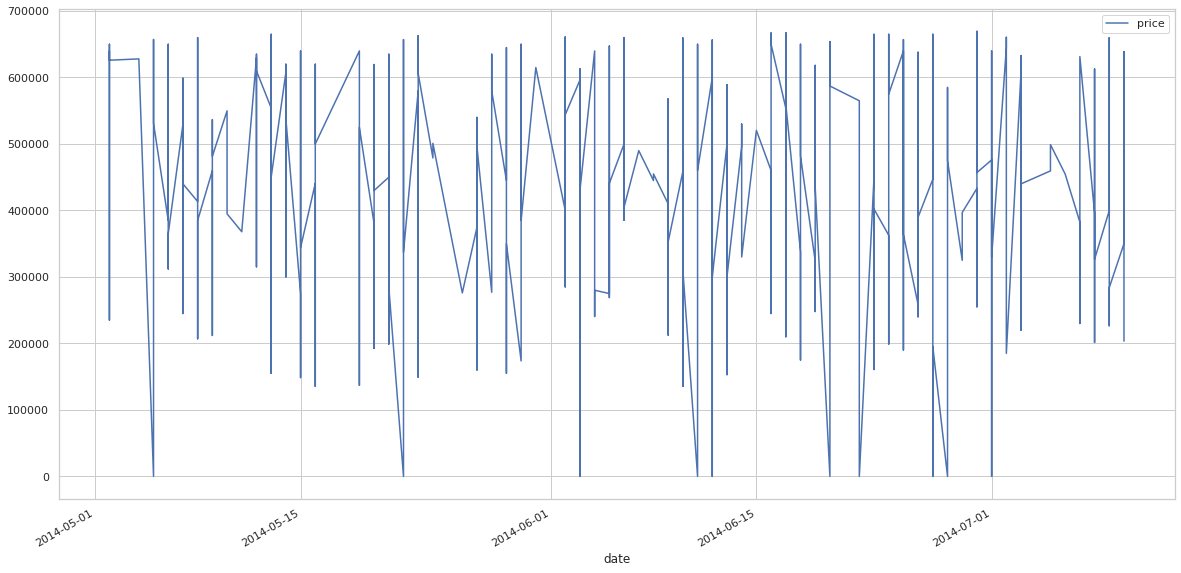

In [22]:
p=['date','price']
seattle_data=house_data_t[house_data['city']=='Seattle']
seattle_data=seattle_data[p]
seattle_data.set_index('date',inplace=True)
seattle_data.head()
seattle_data.plot(grid=True)


From above visualization we can see that in Seattle city there is no significant pattern with time in that span of time.

Thank you. Constructive comments are highly appreciated.